## Sales Data Analysis
#### For details: https://www.youtube.com/watch?v=eMOA1pPVUc4

In [1]:
!ls

Sales_Analysis.ipynb  Sales_Data


In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('Sales_Data/Sales_April_2019.csv')
df2 = pd.read_csv('Sales_Data/Sales_May_2019.csv')
df = pd.concat([df1,df2])

In [3]:
df1.shape, df2.shape, df.shape

((18383, 6), (16635, 6), (35018, 6))

In [4]:
data = pd.DataFrame()
lines = 0
for f in os.listdir('Sales_Data/'):
    df = pd.read_csv('Sales_Data/'+f)
    lines += df.shape[0]
    data = pd.concat([data, df])

In [5]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [6]:
data.shape, lines

((186850, 6), 186850)

### create sales month column

#### Cleaning Dataset

In [7]:
data = data.rename(columns={'Order ID':'ID', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each':'Price_Each',
                    'Order Date':'Order_Date', 'Purchase Address':'Address'})

In [8]:
data.isnull().sum()

ID                  545
Product             545
Quantity_Ordered    545
Price_Each          545
Order_Date          545
Address             545
dtype: int64

In [9]:
data.dropna(axis=0, inplace=True)

In [10]:
data.isna().sum(), data.shape

(ID                  0
 Product             0
 Quantity_Ordered    0
 Price_Each          0
 Order_Date          0
 Address             0
 dtype: int64, (186305, 6))

In [11]:
data[data['Order_Date']=='Order Date']

,ID,Product,Quantity_Ordered,Price_Each,Order_Date,Address
1483,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1904,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2050,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2225,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3091,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
data = data[data['Order_Date']!='Order Date']

In [13]:
data.shape

(185950, 6)

In [14]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data.head()

,ID,Product,Quantity_Ordered,Price_Each,Order_Date,Address
0,150502,iPhone,1,700,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101"


In [15]:
data.tail()

,ID,Product,Quantity_Ordered,Price_Each,Order_Date,Address
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


In [16]:
data['Sale_Month'] = data['Order_Date'].dt.month

In [17]:
data.head()

,ID,Product,Quantity_Ordered,Price_Each,Order_Date,Address,Sale_Month
0,150502,iPhone,1,700,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2


In [18]:
data['Sale_Month'].unique().shape

(12,)

### Add Total Price column

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  object        
 3   Price_Each        185950 non-null  object        
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Address           185950 non-null  object        
 6   Sale_Month        185950 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 11.3+ MB


In [20]:
# Transforming Quantity_Ordered and Price_Each to numeric
data['Quantity_Ordered'] = pd.to_numeric(data['Quantity_Ordered'])
data['Price_Each'] = pd.to_numeric(data['Price_Each'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  int64         
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Address           185950 non-null  object        
 6   Sale_Month        185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 11.3+ MB


In [21]:
data['Total_Price'] = data['Quantity_Ordered'] * data['Price_Each']
data.head()

,ID,Product,Quantity_Ordered,Price_Each,Order_Date,Address,Sale_Month,Total_Price
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68


## Q1. Which month has the best sales record

In [22]:
monthwise_sale = data.groupby('Sale_Month', as_index=False)['Total_Price'].sum()

import calendar
monthwise_sale['Month'] = monthwise_sale['Sale_Month'].apply(lambda x: calendar.month_abbr[x])
monthwise_sale

,Sale_Month,Total_Price,Month
0,1,1.822257e+06,Jan
1,2,2.202022e+06,Feb
2,3,2.807100e+06,Mar
3,4,3.390670e+06,Apr
4,5,3.152607e+06,May
...,...,...,...
7,8,2.244468e+06,Aug
8,9,2.097560e+06,Sep
9,10,3.736727e+06,Oct
10,11,3.199603e+06,Nov


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

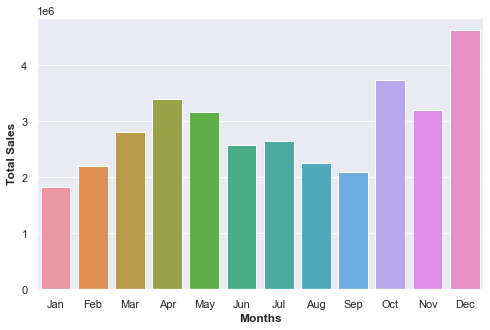

In [24]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x=monthwise_sale['Month'], y=monthwise_sale['Total_Price'])
plt.xlabel("Months", fontweight='bold')
plt.ylabel("Total Sales", fontweight='bold')
plt.show()

 December month has the highest sales may be due to holidays and offers

## Question #2: What city sold the most product?

In [25]:
msg = '866 Spruce St, Portland, ME 0410'
txt = msg.split(',')[-1]
txt.split(' ')[-2]
#txt.apply(lambda x: x[-1].split(' '))

'ME'

In [26]:
def get_city(address):
    city = address.split(',')[-2]
    txt = address.split(',')[-1]
    state = txt.split(' ')[-2]
    return_text = city + ' ' + state
    return return_text
    

In [27]:
data['Address'].apply(lambda x: get_city(x))

0              Portland ME
1         San Francisco CA
2         New York City NY
3               Atlanta GA
4               Seattle WA
               ...        
11681       Los Angeles CA
11682     San Francisco CA
11683     San Francisco CA
11684     San Francisco CA
11685     San Francisco CA
Name: Address, Length: 185950, dtype: object

In [28]:
data['City'] = data['Address'].apply(lambda x: get_city(x))

In [29]:
data.head()

,ID,Product,Quantity_Ordered,Price_Each,Order_Date,Address,Sale_Month,Total_Price,City
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland ME
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco CA
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City NY
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta GA
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle WA


In [30]:
citywise_sale = data.groupby('City',as_index=False)['Total_Price'].sum()
#print("citywise_sale: \n", citywise_sale)
citywise_sale

,City,Total_Price
0,Atlanta GA,2.795499e+06
1,Austin TX,1.819582e+06
2,Boston MA,3.661642e+06
3,Dallas TX,2.767975e+06
4,Los Angeles CA,5.452571e+06
5,New York City NY,4.664317e+06
6,Portland ME,4.497583e+05
7,Portland OR,1.870732e+06
8,San Francisco CA,8.262204e+06
9,Seattle WA,2.747755e+06


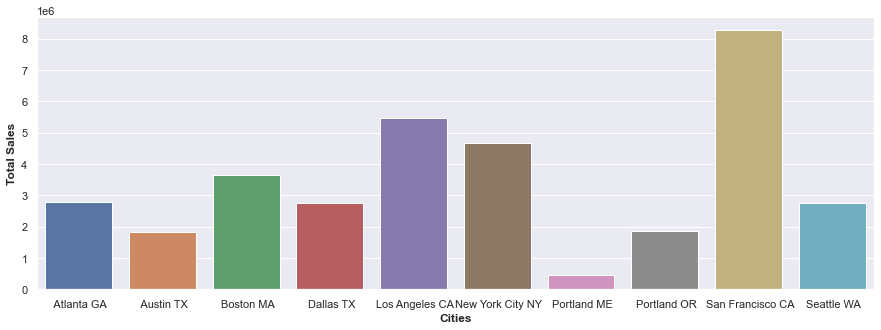

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x=citywise_sale['City'], y=citywise_sale['Total_Price'])

plt.xlabel("Cities", fontweight='bold')
plt.ylabel("Total Sales", fontweight='bold')
plt.show()

## Question #3: What time should we display advertisements to maximize the likelihood of purchases? 

In [32]:
data.head()

,ID,Product,Quantity_Ordered,Price_Each,Order_Date,Address,Sale_Month,Total_Price,City
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland ME
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco CA
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City NY
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta GA
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle WA


In [33]:
data['Hour'] = data['Order_Date'].dt.hour

In [34]:
data.head()

,ID,Product,Quantity_Ordered,Price_Each,Order_Date,Address,Sale_Month,Total_Price,City,Hour
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland ME,1
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco CA,7
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City NY,9
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta GA,16
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle WA,20


In [35]:
hourwise_sale = data.groupby('Hour', as_index=False)['Total_Price'].sum()
hourwise_sale

,Hour,Total_Price
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
...,...,...
19,19,2412938.54
20,20,2281716.24
21,21,2042000.86
22,22,1607549.21


/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


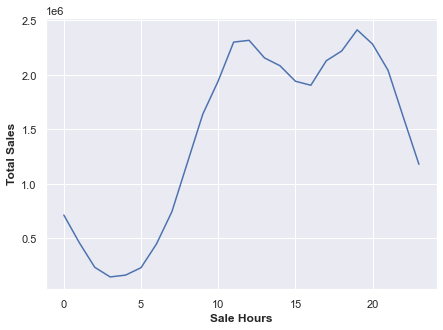

In [36]:
plt.figure(figsize=(7,5))
sns.lineplot(hourwise_sale['Hour'], hourwise_sale['Total_Price'])

plt.xlabel("Sale Hours", fontweight='bold')
plt.ylabel("Total Sales", fontweight='bold')
plt.show()

Maximum number  of orders took place at 11 and 19 O'Clock, So, we should display advertisements around that time

## Question #4: What products are most often sold together? 

In [37]:
data.head()

,ID,Product,Quantity_Ordered,Price_Each,Order_Date,Address,Sale_Month,Total_Price,City,Hour
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland ME,1
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco CA,7
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City NY,9
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta GA,16
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle WA,20


product that sold together will have same ID

In [45]:
dup = data[data['ID'].duplicated(keep=False)][['ID','Product']]
dup

,ID,Product
16,150518,Macbook Pro Laptop
17,150518,iPhone
82,150582,iPhone
83,150582,Lightning Charging Cable
91,150590,Apple Airpods Headphones
...,...,...
11628,259303,AA Batteries (4-pack)
11639,259314,Wired Headphones
11640,259314,AAA Batteries (4-pack)
11677,259350,Google Phone


In [53]:
dup.shape

(14649, 2)

In [75]:
df = dup.groupby('ID').apply(lambda x: ','.join(x['Product'].values))
df

ID
141275              USB-C Charging Cable,Wired Headphones
141290     Apple Airpods Headphones,AA Batteries (4-pack)
141365                   Vareebadd Phone,Wired Headphones
141384                  Google Phone,USB-C Charging Cable
141450            Google Phone,Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop,Wired Headphones
319556                      Google Phone,Wired Headphones
319584                            iPhone,Wired Headphones
319596                    iPhone,Lightning Charging Cable
319631    34in Ultrawide Monitor,Lightning Charging Cable
Length: 7136, dtype: object

In [59]:
data.shape

(185950, 10)

In [62]:
df = dup.groupby('ID')['Product'].transform(lambda x: ','.join(x))
df

16                             Macbook Pro Laptop,iPhone
17                             Macbook Pro Laptop,iPhone
82                       iPhone,Lightning Charging Cable
83                       iPhone,Lightning Charging Cable
91       Apple Airpods Headphones,AAA Batteries (4-pack)
                              ...                       
11628       34in Ultrawide Monitor,AA Batteries (4-pack)
11639            Wired Headphones,AAA Batteries (4-pack)
11640            Wired Headphones,AAA Batteries (4-pack)
11677                  Google Phone,USB-C Charging Cable
11678                  Google Phone,USB-C Charging Cable
Name: Product, Length: 14649, dtype: object

In [63]:
from itertools import combinations
from collections import Counter

In [76]:
count = Counter()
for row in df:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question #5: What product sold the most? Why do you think it did?

In [83]:
productwise_count = data.groupby('Product')['ID'].count()
productwise_count

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: ID, dtype: int64

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


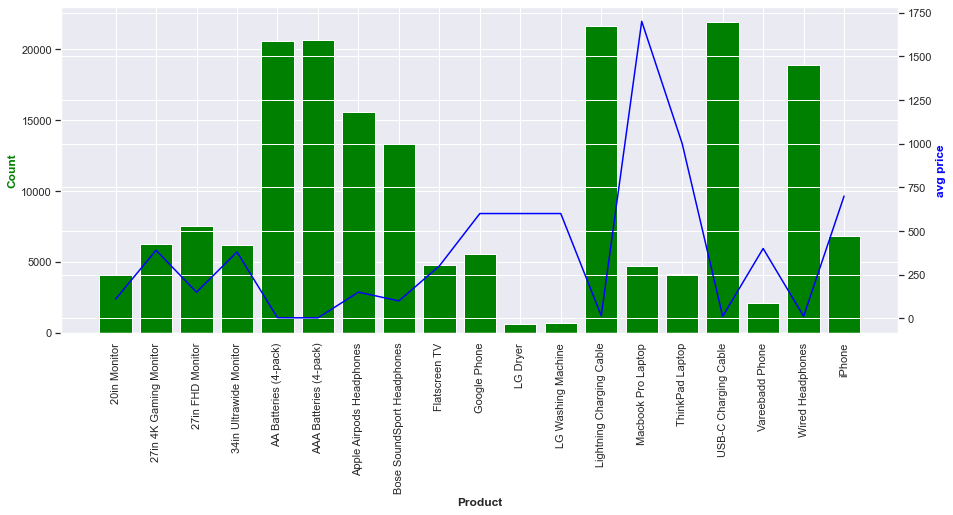

In [120]:
fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()
ax1.bar(x=productwise_count.index, height=productwise_count.values, color='green')
ax1.set_ylabel('Count', color='green', fontweight='bold')
ax1.set_xlabel('Product', fontweight='bold')

ax2.plot(productwise_count.index, avg_price.values, color='blue')

ax1.set_xticklabels(labels=productwise_count.index, rotation=90)
ax2.set_ylabel('avg price', color='blue', fontweight='bold')
plt.show()

for most of the products, the number of salses are higher if price of the product is lower

In [91]:
avg_price = data.groupby('Product')['Price_Each'].apply(lambda x: np.average(x))
avg_price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price_Each, dtype: float64

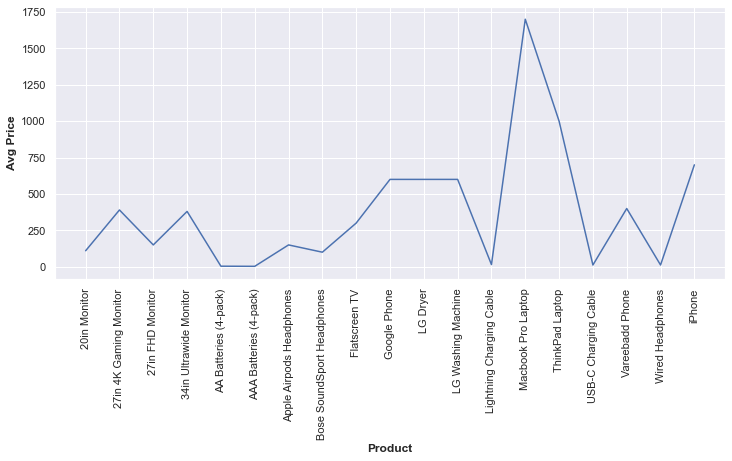

In [121]:
plt.figure(figsize=(12,5))
plt.plot(avg_price.index, avg_price.values)
plt.xlabel("Product", fontweight='bold')
plt.ylabel("Avg Price", fontweight='bold')
plt.xticks(rotation=90)
plt.show()

Question #4: What products are most often sold together?

In [130]:
dup = data[data['ID'].duplicated(keep=False)]
dup

,ID,Product,Quantity_Ordered,Price_Each,Order_Date,Address,Sale_Month,Total_Price,City,Hour
16,150518,Macbook Pro Laptop,1,1700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",2,1700.00,San Francisco CA,12
17,150518,iPhone,1,700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",2,700.00,San Francisco CA,12
82,150582,iPhone,1,700.00,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",2,700.00,Seattle WA,23
83,150582,Lightning Charging Cable,1,14.95,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",2,14.95,Seattle WA,23
91,150590,Apple Airpods Headphones,1,150.00,2019-02-08 09:35:00,"196 River St, San Francisco, CA 94016",2,150.00,San Francisco CA,9
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,13


In [135]:
dup_items = dup.groupby('ID')['Product'].transform(lambda x: ','.join(x))
dup_items

16                             Macbook Pro Laptop,iPhone
17                             Macbook Pro Laptop,iPhone
82                       iPhone,Lightning Charging Cable
83                       iPhone,Lightning Charging Cable
91       Apple Airpods Headphones,AAA Batteries (4-pack)
                              ...                       
11628       34in Ultrawide Monitor,AA Batteries (4-pack)
11639            Wired Headphones,AAA Batteries (4-pack)
11640            Wired Headphones,AAA Batteries (4-pack)
11677                  Google Phone,USB-C Charging Cable
11678                  Google Phone,USB-C Charging Cable
Name: Product, Length: 14649, dtype: object

In [144]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in dup_items:
    row_emnt = row.split(',')
    count.update(Counter(combinations(row_emnt, 2)))
                 
                 
                 
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253
